####                                 Importing relevant libraries :

In [1]:
import numpy as np          # For complicated mathematical alculaions
import pandas as pd,datetime as dt    # For Data Manipulations
import matplotlib.pyplot as plt      # For plotting the graphs and figures
import seaborn as sns       # For Visualization  
import ast                   # to interact with the Python code itself and can modify it.

from scipy import stats         ## to use statistics module functions
from ast import literal_eval     ## evaluate strings containing Python code

import warnings             #  disable warning 
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


##### Reading the dataset into Python Environment :

In [3]:
# Using movies metadataset 

dataset = pd.read_csv("movies_metadata.csv")

dataset.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


##### Checking the basic details of the dataset :

In [4]:
### Displaying information about the dataframe including the index,dtype and columns, non-null values and memory usages.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
## Generating a sample random of row or column.

dataset.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
38899,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",http://www.idanielblake.co.uk/,374473,tt5168192,en,"I, Daniel Blake","A middle aged carpenter, who requires state we...",...,2016-10-21,260354.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,"I, Daniel Blake",False,7.7,264.0
35264,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,253286,tt3288948,en,Two Step,Two Step is a fast-paced Texas thriller in whi...,...,2015-07-31,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Two Step,False,5.3,6.0
15793,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,31428,tt0078295,en,Someone's Watching Me!,A woman is being watched in her apartment by a...,...,1978-11-27,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Someone's Watching Me!,False,6.0,22.0
41225,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,81178,tt0029761,en,When You're in Love,When You're in Love is a 1937 musical film sta...,...,1937-02-12,0.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,When You're in Love,False,3.5,2.0
4806,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,3537,tt0080716,en,Fame,A chronicle of the lives of several teenagers ...,...,1980-05-16,21202829.0,134.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}, {'iso...",Released,"If they've really got what it takes, it's goin...",Fame,False,6.0,97.0
25795,False,NaN,8000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...",NaN,303542,tt3078296,it,Il ragazzo invisibile,"Michele is thirteen year old, shy, unpopular a...",...,2014-12-18,0.0,0.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,NaN,The Invisible Boy,False,6.0,170.0
24053,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,56364,tt0070578,en,The Pyx,A detective investigating the death of a heroi...,...,1973-09-08,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,See It...Find Out What It Means!,The Pyx,False,5.6,8.0
35397,False,NaN,0,[],NaN,72443,tt0416881,ja,ジョゼと虎と魚たち,Tsuneo is a university student working part-ti...,...,2003-12-13,0.0,116.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,"Josee, the Tiger and the Fish",False,6.2,10.0
31462,False,NaN,0,[],NaN,297173,tt1457759,en,The Expedition,A Documentary crew entered an asylum to shoot ...,...,NaN,0.0,107.0,[],Released,On Halloween night five filmmakers enter a hau...,The Expedition,True,2.0,1.0
42869,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,347882,tt4573516,en,Sleight,A young street magician is left to take care o...,...,2017-04-28,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You can change the cards you're dealt,Sleight,False,5.8,64.0


##   Exploratory Data Analysis (EDA) :-

                 
####                  EDA is the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.


In [6]:
## dtypes returns the data types of the columns.

dataset.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [7]:
# Shape of the dataset, i.e displaying number of rows and columns

print("Shape of the dataset is ",dataset.shape)

print('The total number of movies are',dataset.shape[0])

Shape of the dataset is  (45466, 24)
The total number of movies are 45466


In [8]:
# To find the size of the dataset

dataset.size

1091184

In [9]:
# To display the columns

dataset.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [10]:
## nunique() returns the series with number of distinct observations over requested axis.

dataset.nunique()

adult                        5
belongs_to_collection     1698
budget                    1226
genres                    4069
homepage                  7673
id                       45436
imdb_id                  45417
original_language           92
original_title           43373
overview                 44307
popularity               44176
poster_path              45024
production_companies     22708
production_countries      2393
release_date             17336
revenue                   6863
runtime                    353
spoken_languages          1931
status                       6
tagline                  20283
title                    42277
video                        2
vote_average                92
vote_count                1820
dtype: int64

#####            The movie dataset consists of total 45466 (rows) and there and 24 columns. 

### Analysis of  Movies based on Producion Countries :-


         From the dataset analysis, most of the films are in English langage i.e. more than 31000 films which are shot in various locations around the world. It would be interesting to know the most popular destinations for the filmmakers to shoot their films.

In [11]:
dataset['production_countries'] = dataset['production_countries'].fillna('[]').apply(ast.literal_eval)
dataset['production_countries'] = dataset['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [12]:
s = dataset.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [13]:
con_dif = dataset.drop('production_countries', axis=1).join(s)
con_dif = pd.DataFrame(con_dif['countries'].value_counts())
con_dif['country'] = con_dif.index
con_dif.columns = ['num_movies', 'country']
con_dif = con_dif.reset_index().drop('index', axis=1)
con_dif.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


The United States is the most popular destination of production for movies given in our dataset. Second production country is the Europe accompanied by France, Germany and Italy in the top 5. Japan and India are the most popular Asian countries when it comes to movie production.

### Movie Analysis based on Production Companies :-

##### To find out the highest earning production company

In [14]:
dataset['production_companies'] = dataset['production_companies'].fillna('[]').apply(ast.literal_eval)
dataset['production_companies'] = dataset['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [15]:
s = dataset.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [16]:
com_dif = dataset.drop('production_companies', axis=1).join(s)

In [17]:
comp_sum = pd.DataFrame(com_dif.groupby('companies')['revenue'].sum().sort_values(ascending=False))
comp_sum.columns = ['Total']
comp_mean = pd.DataFrame(com_dif.groupby('companies')['revenue'].mean().sort_values(ascending=False))
comp_mean.columns = ['Average']
comp_count = pd.DataFrame(com_dif.groupby('companies')['revenue'].count().sort_values(ascending=False))
comp_count.columns = ['Number']

comp_pivot = pd.concat((comp_sum, comp_mean, comp_count), axis=1)

In [18]:
comp_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,5.082015e+07,1250
Universal Pictures,5.525919e+10,6.657734e+07,830
Paramount Pictures,4.880819e+10,4.866221e+07,1003
Twentieth Century Fox Film Corporation,4.768775e+10,5.704276e+07,836
Walt Disney Pictures,4.083727e+10,1.552748e+08,263
Columbia Pictures,3.227974e+10,7.489498e+07,431
New Line Cinema,2.217339e+10,8.004834e+07,277
Amblin Entertainment,1.734372e+10,2.282068e+08,76
DreamWorks SKG,1.547575e+10,1.629027e+08,95


 ###### Warner Bros is the highest earning production company of all time earning a staggering 63.5 billion dollars from close to 500 movies.
     
######      Universal Pictures and Paramaount Pictures are the second and the third highest earning companies with 55 billion dollars and 48 billion dollars in revenue respectively.

##### Most Successful Production Companies : -

In [19]:
comp_pivot[comp_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
companies,,,
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
WingNut Films,7.111004e+09,4.444378e+08,16
Heyday Films,7.920012e+09,4.400007e+08,18
Twentieth Century Fox Animation,5.572269e+09,3.714846e+08,15
Marvel Studios,1.169964e+10,3.656136e+08,32
Lucasfilm,9.898421e+09,3.413249e+08,29
Jerry Bruckheimer Films,8.957441e+09,3.317571e+08,27
Marvel Enterprises,6.538067e+09,3.269034e+08,20
Legendary Pictures,1.346866e+10,3.206825e+08,42


       Revolution Sun Studios has been the most succesful Production Companies by producing more successfull movies based on average.

### Movie Analysis based on Original Language :-

In [20]:
dataset['original_language'].drop_duplicates().shape[0]

93

In [21]:
lang_dif = pd.DataFrame(dataset['original_language'].value_counts())
lang_dif['language'] = lang_dif.index
lang_dif.columns = ['number', 'language']
lang_dif.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de



######  1. Ploting the number of movies made based on their languages.

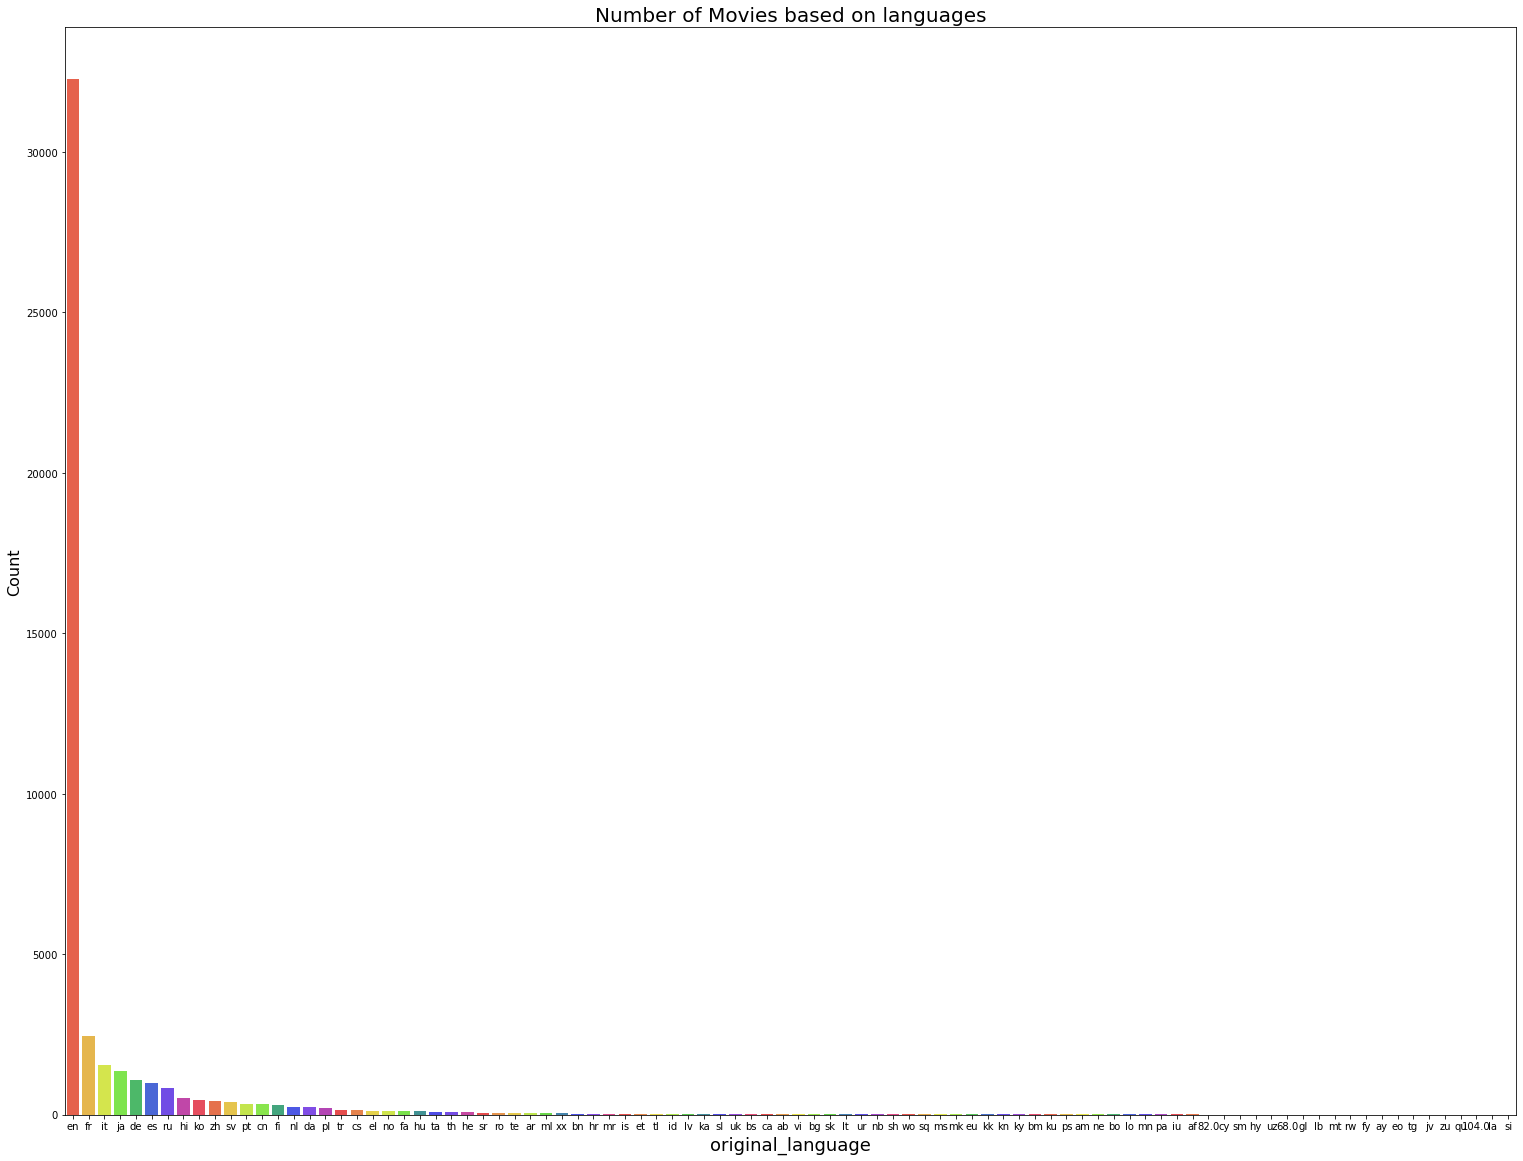

In [22]:
count = dataset['original_language'].value_counts()
plt.figure(figsize=(26,20))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=16)
plt.xlabel('original_language', fontsize=18)
plt.title('Number of Movies based on languages', fontsize = 20)
plt.show()

######  2. Ploting the majority of movies made based on languages other than English :-

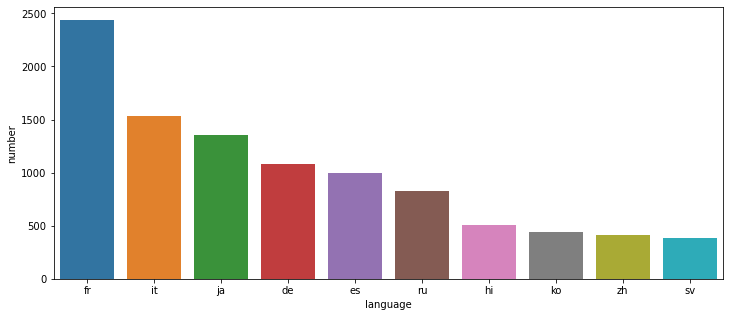

In [23]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_dif.iloc[1:11])
plt.show()

There are total 93 distinct languages from the dataset of 45466 movies.
From 93 languages, majority of the movies are made in English followed by French, Italian, Japanese and deuteche languages. Hindi language also has a good contribution in the movies dataset.

In [24]:
# Creating a feature 'year' column with datetime object for each movie.

dataset['year'] = pd.to_datetime(dataset['release_date'], errors='coerce').apply(lambda x: x.year)

In [25]:
dataset.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0


In [26]:
dataset.tail(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,2011.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,1917.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0,2017.0


####  Finding the Most Voted Movies

In [27]:
dataset[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010.0
12481,The Dark Knight,12269.0,2008.0
14551,Avatar,12114.0,2009.0
17818,The Avengers,12000.0,2012.0
26564,Deadpool,11444.0,2016.0
22879,Interstellar,11187.0,2014.0
20051,Django Unchained,10297.0,2012.0
23753,Guardians of the Galaxy,10014.0,2014.0
2843,Fight Club,9678.0,1999.0
18244,The Hunger Games,9634.0,2012.0


                   Inception, The Dark Knight and Avatar movies are the most voted movies by the audience in the dataset based on the vote counts.

### Finding the list of movies based on Release Dates :-

#### Movie analysis based on released year :-

<AxesSubplot:title={'center':'Movies Produced '}, xlabel='year', ylabel='Count'>

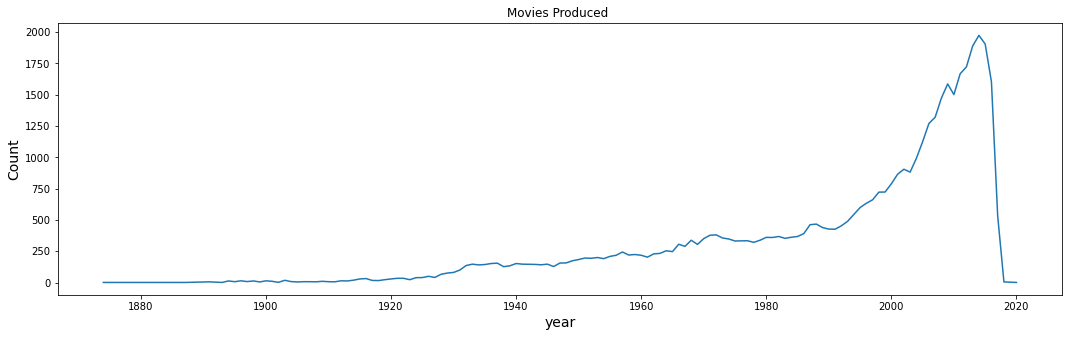

In [28]:
year_count = dataset.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
plt.ylabel('Count', fontsize=14)
plt.xlabel('Released Year', fontsize=14)
plt.title('Movies Produced ')
year_count.plot()

In [29]:
######  Earliest Movies represented :-

dataset[dataset['year'] != 'NaT'][['title', 'year', 'original_language']].sort_values('year', ascending = True).head(10)

,title,year,original_language
34940,Passage of Venus,1874.0,xx
34937,Sallie Gardner at a Gallop,1878.0,en
41602,Buffalo Running,1883.0,en
34933,Man Walking Around a Corner,1887.0,xx
34934,Accordion Player,1888.0,xx
34938,Traffic Crossing Leeds Bridge,1888.0,xx
34936,"Monkeyshines, No. 2",1890.0,xx
34939,London's Trafalgar Square,1890.0,xx
34935,"Monkeyshines, No. 1",1890.0,en
41194,Mosquinha,1890.0,en


The movie "Passage of Venus" is the oldest among the list in IMDb movies. It is a series of photographs of the transit of the planet Venus across the Sun on 9 December 1874. 

#### Finding the released date in terms of years, months and days of the week. 

            Release Dates can often play a very important role in determining the success and the revenue generated by a particular movie. So it can be considered as a specific feature for this dataset.

In [30]:
monthwise = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
daywise = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [31]:
def get_month(x):
    try:
        return monthwise[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [32]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return daywise[answer]
    except:
        return np.nan

In [33]:
# Adding the features month and day

dataset['day'] = dataset['release_date'].apply(get_day)
dataset['month'] = dataset['release_date'].apply(get_month)

###### Ploting most successful/popular months of movie releasing :-

<AxesSubplot:title={'center':'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

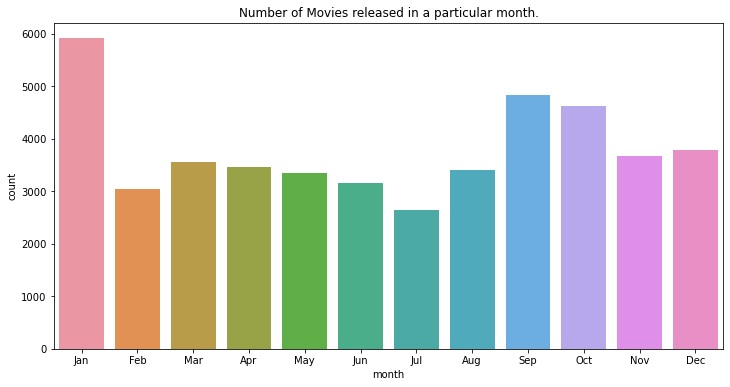

In [34]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=dataset, order=monthwise)

   When it comes in movie release, January is the most popular month as it is consideed as dump month.

 Ploting the most popular day for releasing movies :-

plt.figure(figsize=(12,6))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=dataset, order= daywise)

### Movie Status :-

In [35]:
dataset['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

            Although not relevant feature, I have gathered the information of all the movies based on their status that provides interesting insights of the nature of movies in this dataset. Almost all of the movies has been released.

#### Spoken Languages :-

In [36]:
# Converting spoken languages into numeric for finding the maximum number of languages spoken in a film.

dataset['spoken_languages'] = dataset['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [37]:
dataset['spoken_languages'].value_counts()

1     33736
2      5371
0      3835
3      1705
4       550
5       178
6        62
7        14
8         6
9         5
10        1
12        1
19        1
13        1
Name: spoken_languages, dtype: int64

            From this, 19 is the highest number of languages spoken in a film.

######  Finding the films with more than 10 spoken languages.

In [38]:
dataset[dataset['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

,title,year,spoken_languages
22235,Visions of Europe,2004.0,19
35288,The Testaments,2000.0,13
14093,To Each His Own Cinema,2007.0,12
8789,The Adventures of Picasso,1978.0,10


        The movie "Vision of Europe" has the highest number of spoken languages of 19 which shows the diversity of the movie in terms of languages.

#### Movies Analysis based on RunTime :-

In [39]:
dataset['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

                The average length of a movie is about 1 hour and 30 minutes. The longest movie on record in this dataset is about 1256 minutes (or 20 hours) long.

In [40]:
dataset['runtime'] = dataset['runtime'].astype('float')

<AxesSubplot:xlabel='runtime', ylabel='Density'>

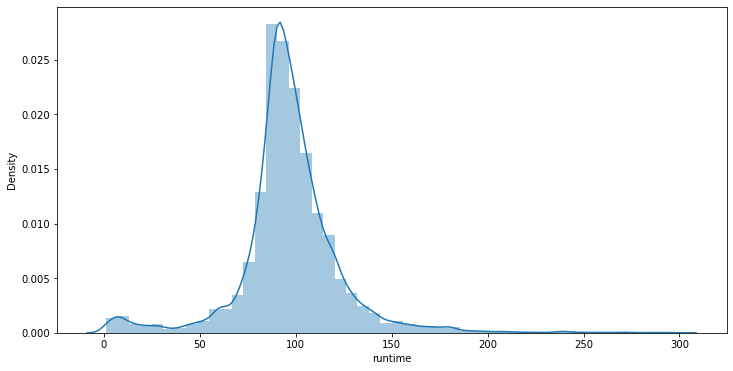

In [41]:
######  Ploting a distribution of mainstream movies.

plt.figure(figsize=(12,6))
sns.distplot(dataset[(dataset['runtime'] < 300) & (dataset['runtime'] > 0)]['runtime'])

 Finding the longest movies and shortest movie based on runtime :-

In [42]:
dataset[dataset['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,year
24178,1256.0,Centennial,1978.0
40938,1140.0,Baseball,1994.0
19965,1140.0,Jazz,2001.0
13767,931.0,Berlin Alexanderplatz,1980.0
13953,925.0,Heimat: A Chronicle of Germany,1984.0
27855,900.0,The Story of Film: An Odyssey,2011.0
26682,877.0,Taken,2002.0
19158,874.0,The War,2007.0
34667,840.0,The Roosevelts: An Intimate History,2014.0
34732,840.0,Seventeen Moments in Spring,1973.0


In [43]:
dataset[dataset['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

,runtime,title,year
35146,1.0,La Vague,1891.0
36577,1.0,Champs de Mars,1900.0
36576,1.0,Palace of Electricity,1900.0
44965,1.0,"Luis Martinetti, Contortionist",1894.0
42357,1.0,A Gathering of Cats,2007.0
36575,1.0,Eiffel Tower from Trocadero Palace,1900.0
36574,1.0,Panorama of Eiffel Tower,1900.0
44714,1.0,The Infernal Caldron,1903.0
19244,1.0,The Kiss,1896.0
44646,1.0,The Vanishing Lady,1896.0


###### Creating a dataframe of voteaverage with the title :-

In [44]:
dataset.groupby('title')['vote_average'].mean().sort_values(ascending = False).head()

title
An Apology to Elephants                   10.0
Mera Naam Joker                           10.0
Patient Zero                              10.0
Looking for Grace                         10.0
Big Jay Oakerson: Live at Webster Hall    10.0
Name: vote_average, dtype: float64

In [45]:
dataset.groupby('title')['vote_average'].count().sort_values(ascending = False).head()

title
Cinderella              11
Alice in Wonderland      9
Hamlet                   9
Les Misérables           8
Beauty and the Beast     8
Name: vote_average, dtype: int64

In [46]:
dataset.groupby('title')['vote_average'].mean().sort_values(ascending = True).head()

title
ファンタスティポ                                0.0
Saturday's Hero                         0.0
Freedom Song                            0.0
Satan's Sword: The Dragon God           0.0
Satan's Sword III: The Final Chapter    0.0
Name: vote_average, dtype: float64

         There are many films that have got a vote averages of 9.5 and there are many films with 0 vote aaverages in this movies dataset.

#####  Movie Analysis based on Revenue :-


##### Ploting the movies based on their revenues.

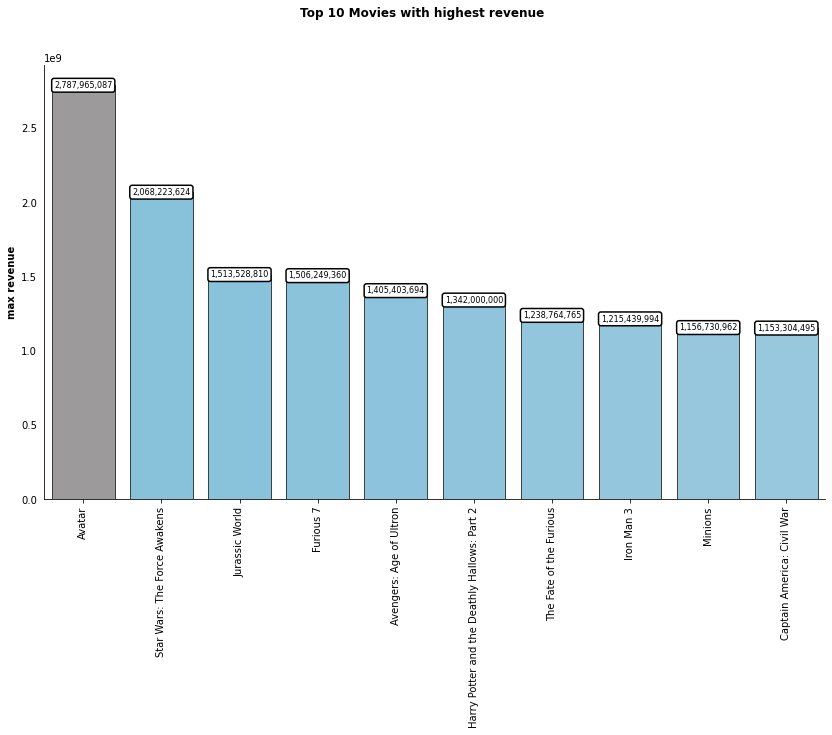

In [47]:
fig = plt.figure(figsize=(14,8))
gs = fig.add_gridspec(1,1)

pal = sns.light_palette('#79c6e8', reverse=True, n_colors=50)
pal.insert(0,'#9c9a9a')

cars = dataset.groupby('original_title')['revenue'].mean().sort_values(ascending=False).head(10)
color = ['skyblue' for i in range(15)]
color[0] = 'red'
ax = fig.add_subplot(gs[0,0])
ax=sns.barplot(x=cars.index, y=cars.values, edgecolor='k', linewidth=0.7, palette=pal)
ax.tick_params(axis='x', labelsize=10, rotation=90)
ax.tick_params(axis='y', labelsize=10, left=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel='max revenue', fontsize=10, weight='bold')
for p in ax.patches:
    value = f'{p.get_height():,.0f}'
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height()+38
    ax.text(x=x, y=y, s=value, fontsize=8, ha='center', va='center',
           bbox=dict(fc='white', edgecolor='k', boxstyle='round', linewidth=1.5))
    
fig.suptitle(t='Top 10 Movies with highest revenue', fontsize=12, weight='bold')
sns.despine()
plt.show()

The movie 'Avatar' is the top most movie based on revenue. Second is the Star Wars: The Force Awakens accompanied by Jurassic World, Furious 7 etc. and so on.

####  Top most critically Praised Movies :-

In [48]:
dataset[dataset['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994.0
834,The Godfather,8.5,6024.0,1972.0
2211,Life Is Beautiful,8.3,3643.0,1997.0
5481,Spirited Away,8.3,3968.0,2001.0
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975.0
1176,Psycho,8.3,2405.0,1960.0
2843,Fight Club,8.3,9678.0,1999.0
1178,The Godfather: Part II,8.3,3418.0,1974.0
12481,The Dark Knight,8.3,12269.0,2008.0
292,Pulp Fiction,8.3,8670.0,1994.0


             In the dataset , the movies like The Shawshank Redemption and The Godfather  with 8.5 TMDb ratings and Life is beautiful with 8.3 are the most acclaimed movies in the dataset.

####  Movies based on Budget :-

In [49]:
dataset[dataset['budget'].notnull()][['title', 'budget', 'revenue', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,year
9247,Revolutionary Girl Utena: The Movie,998000,0.0,1999.0
39203,Life Feels Good,996519,0.0,2013.0
11609,Kidulthood,994000,165000.0,2006.0
34215,The Peanuts Movie,99000000,246233113.0,2015.0
39688,Don't Breathe,9900000,157100845.0,2016.0
39842,Friend Request,9900000,2400000.0,2016.0
39793,Elle,9804690,2341534.0,2016.0
30179,BMX Bandits,980385,0.0,1983.0
14,Cutthroat Island,98000000,10017322.0,1995.0
4142,The Mummy Returns,98000000,433013274.0,2001.0


### Movies based on Genres : -

In [50]:
dataset['genres'] = dataset['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [51]:
s = dataset.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [52]:
gen_df = dataset.drop('genres', axis=1).join(s)

In [53]:
gen_df['genre'].value_counts().shape[0]

32

#####  To find the most popular occuring genre among the 45466 movies in he dataset. 

In [54]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


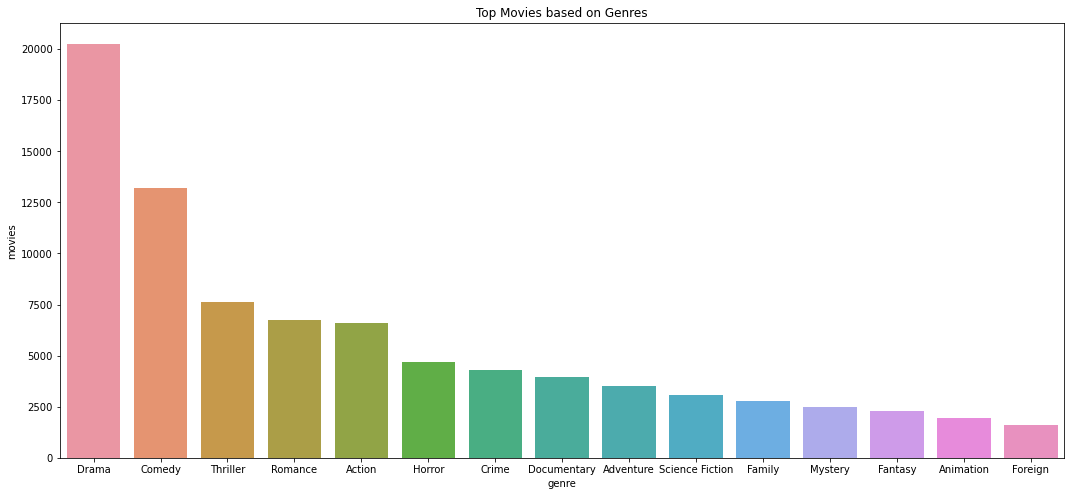

In [55]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.title("Top Movies based on Genres")
plt.show()

                       Drama is the most commonly occurring genre with almost half the movies of about 20265 films identifying itself as a drama film. Comedy comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres represented in the top 10 are Comedy, Thriller,Romance, Action, Horror, Crime, Mystery,etc. and so on.

###### Ploting the graph of float variables in the dataset like revenue, runtime, vote_average and vote_count of the movies.

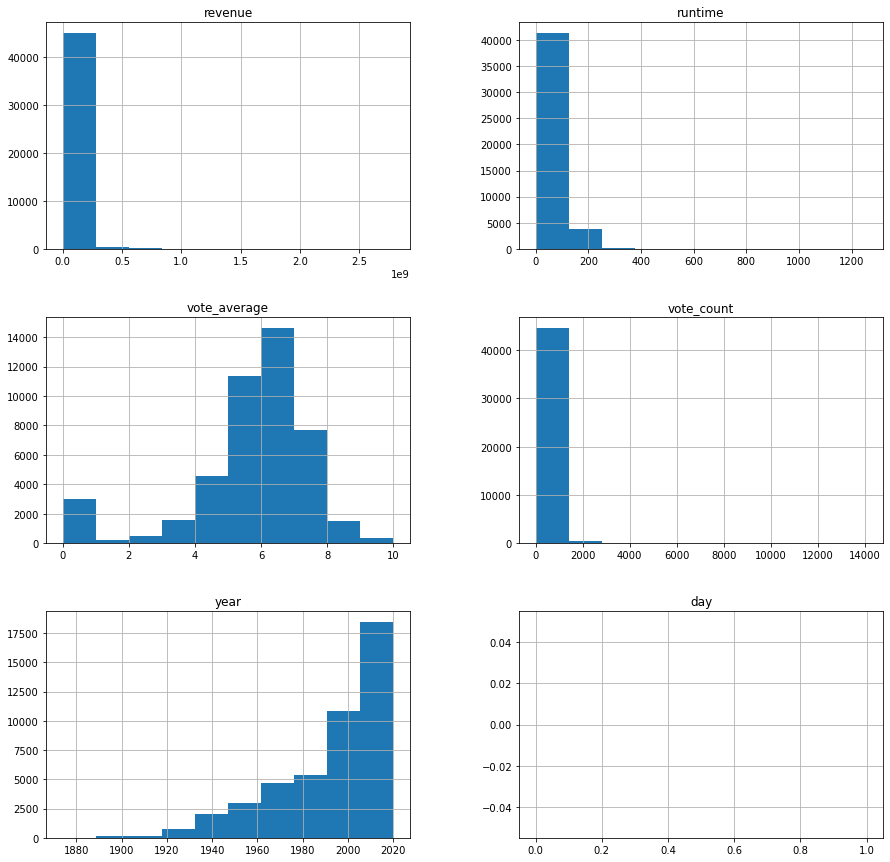

In [56]:
freqgraph=dataset.select_dtypes(include=['float'])
freqgraph.hist(figsize=(15,15))
plt.show()

<AxesSubplot:>

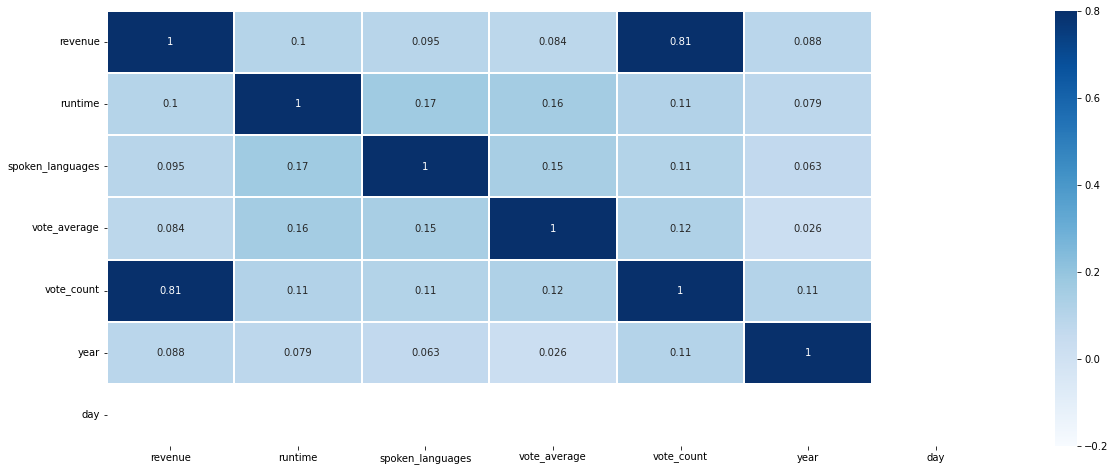

In [57]:
corrmatrix=dataset.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.2,vmax=0.8,linewidth=0.2,cmap='Blues')

The movies with highest revenue has the highest correlation with vote_count, so we can assume that movies with highest revenues have the highest votecounts. 


In [58]:
dataset.dtypes


adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages           int64
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
year                     float64
day                      float64
month                     object
dtype: object

#  Data Preprocessing :-

  
  #### As already seen, the data set is not a clean dataset. Necessary preprocessing activities are to be done



  #####       In Data Science, the performance of the model is depending on data preprocessing and data handling. Suppose if we build a model without Handling data, we get an accuracy of around 70%. By applying the Feature engineering on the same model there is a chance to increase the performance from 70% to more. So by using Feature Engineering we can improve the performance of the model.

####  Necessary Preprocessing steps are to be done on the movies dataset for a better Recommendation System model to transform the unstructured data into structured data.

###  1. Checking the Null/Missing values in the dataset :-

In [59]:
dataset.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         0
production_countries         0
release_date                87
revenue                      6
runtime                    263
spoken_languages             0
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
year                        90
day                      45466
month                       90
dtype: int64

       There are so many missing values in the dataset. 
       So we need to fill the null values first by replacing them with some values of their own using fillna(), replace() or by  interpolate() like functions.

###  1(1).  Filling / Handling the null values 



             The null values in the dataset are imputed using mean/median or mode based on the type of data that is missing:

Numerical Data:   
                If a numerical value is missing, then replace that NaN value with mean or median. It is preferred to impute using the median value as the average or the mean values are influenced by the outliers and skewness present in the data and are pulled in their respective direction.


Categorical Data:
                 When categorical data is missing, replace that with the value which is most occurring i.e. by mode. 

In [60]:
### Handling the Categorical features in the dataset.

## Missing values of categorical values:

dataset[['belongs_to_collection','homepage','imdb_id','original_language','overview','popularity','poster_path','production_companies','production_countries','release_date','status','title','tagline','video','month']].isna().sum()

belongs_to_collection    40972
homepage                 37684
imdb_id                     17
original_language           11
overview                   954
popularity                   5
poster_path                386
production_companies         0
production_countries         0
release_date                87
status                      87
title                        6
tagline                  25054
video                        6
month                       90
dtype: int64

In [61]:
## We can also fill null values of categorical values by,

obj_cols = list(dataset.select_dtypes('object').columns)
for o in obj_cols:
    dataset[o].fillna("NULL",inplace = True)
    

In [62]:
## Filled missing values of categorical values :-

dataset[['imdb_id','original_language','overview','popularity','production_companies','production_countries','release_date','status','title','video','month']].isna().sum()

imdb_id                 0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
status                  0
title                   0
video                   0
month                   0
dtype: int64

#### 1(2). Numeric Data :-     Imputing with Mean/Median/Mode/Backward fill/ Forward fill



###### Null values are replaced with mean/median.mode in this method. This is the statistical method of handling Null values. This method yields good results when compared to removing null values.



###### The mean of the numerical column data is used to replace null values when the data is normally distributed. Median is used if the data comprised of outliers. Mode is used when the data having more occurences of a particular value or more frequent value.

In [63]:
# Handling missing values of numerical variables,

dataset[['runtime','revenue','vote_average','vote_count','year']].isna().sum()

runtime         263
revenue           6
vote_average      6
vote_count        6
year             90
dtype: int64

In [64]:
dataset['revenue'].mean()

11209348.539265288

In [65]:
dataset['revenue'].median()

0.0

In [66]:
dataset['runtime'].mode()

0    90.0
dtype: float64

In [67]:
dataset['vote_count'].median()

10.0

In [68]:
dataset['vote_count'].mean()

109.89733831940167

In [69]:
dataset['vote_count'].mode()

0    1.0
dtype: float64

In [70]:
dataset['vote_average'].median()

6.0

In [71]:
dataset['vote_average'].mode()

0    0.0
dtype: float64

In [72]:
dataset['year'].median()

2001.0

In [73]:
dataset['year'].mean()

1991.8811927009874

In [74]:
dataset['year'].mode()

0    2014.0
dtype: float64

In [75]:
dataset['runtime'] = dataset['runtime'].fillna(dataset['runtime'].mean())

In [76]:
dataset['runtime'].isnull().sum()

0

In [77]:
dataset['revenue'] = dataset['revenue'].fillna(dataset['revenue'].median())

In [78]:
dataset['revenue'].isnull().sum()

0

In [79]:
dataset['vote_count'] = dataset['vote_count'].fillna(dataset['vote_count'].mean())

In [80]:
dataset['vote_count'].isnull().sum()

0

In [81]:
dataset['vote_average'] = dataset['vote_average'].fillna(dataset['vote_average'].mean())

In [82]:
dataset['vote_average'].isna().sum()

0

In [83]:
dataset['year'] = dataset['year'].fillna(dataset['year'].mean())

In [84]:
dataset['year'].isna().sum()

0

In [85]:
dataset['day'].median()

nan

In [86]:
dataset['day'].mode()

Series([], dtype: float64)

In [87]:
dataset['day'].mean()

nan

In [88]:
dataset.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
genres                       0
homepage                     0
id                           0
imdb_id                      0
original_language            0
original_title               0
overview                     0
popularity                   0
poster_path                  0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                      0
spoken_languages             0
status                       0
tagline                      0
title                        0
video                        0
vote_average                 0
vote_count                   0
year                         0
day                      45466
month                        0
dtype: int64

Here in the feature day, there are so many missing values. So we can delete or ignore the column day from the dataset which is least sigificant for the modeling.

####   Alternative way:    Deleting the columns with missing data
 If there is certain columns with missing data, then you can delete the entire column.

         axis=1 is used to drop the column with `NaN` values.
         axis=0 is used to drop the row with `NaN` values.

The problem with this method is that we may lose valuable information on that feature, as we have deleted it completely due to some null values.Hence, it should only be used if there are too many null values.

We can set a limit to 70 percent, so that the columns having null values more than or equal to 70 percent are dropped from the dataframe. Viewing columns to see which column in the dataset has been dropped.

In [89]:
dataset.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages           int64
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
year                     float64
day                      float64
month                     object
dtype: object

## 2. Feature Engineering :-

                
 ####         Feature Engineering is a process of extracting useful features from raw data using math, statistics and domain knowledge. It is a method of making data easier to analyze. Data in the real world can be extremely messy and chaotic.
           
        
#####          It helps in data cleaning for a better model. It deals with inappropriate data, missing values, human interruption, general errors,etc.    

######           Feature engineering efforts mainly have two goals. They are :-  

                1. Preparing the proper input dataset, compatible with the machine learning algorithm requirements. 
                
                2. Improving the performance of machine learning models.
            
               

In [90]:
##Checking the distinct values in adult field
dataset.adult.value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

##### From the above, it is evident that the values other than True and False are not expected, so the other 3 lines can be dropped.

In [91]:
i = dataset[((dataset.adult == ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.') )].index
i

Int64Index([35587], dtype='int64')

In [92]:
dataset=dataset.drop(i)

In [93]:
dataset.adult.value_counts()

False                                                                                                             45454
True                                                                                                                  9
 - Written by Ørnås                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.        1
Name: adult, dtype: int64

In [94]:
dataset.shape

(45465, 27)

In [95]:
i = dataset[((dataset.adult == ' - Written by Ørnås') )].index
i

Int64Index([19730], dtype='int64')

In [96]:
dataset=dataset.drop(i)
dataset.adult.value_counts()

False                                                                                                             45454
True                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.        1
Name: adult, dtype: int64

In [97]:
i = dataset[((dataset.adult == ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.') )].index
i

Int64Index([29503], dtype='int64')

In [98]:
dataset=dataset.drop(i)

In [99]:
dataset.adult.value_counts()

False    45454
True         9
Name: adult, dtype: int64

#### 2(1). Feature Selection : -

       It is the selection of required independent features. Selecting the important independent features which have more relation with the dependent features will help to build a good model.The performance of a network can be improved by reducing the number of inputs, even sometimes at the cost of losing some input information.It explicitly identify the input variables that do notcontribute significantly to the performance of networks, then by suggesting to remove them.

Creation of new derived features like year, month and day

#### 2(2). Feature Reduction :-

            Dropping the Columns with more null values and which is unnecessary for the model.

In [100]:
dataset.drop('belongs_to_collection', inplace=True,axis=1)

In [101]:
dataset.drop('homepage', inplace=True,axis=1)
dataset.drop('tagline', inplace=True,axis=1)
dataset.drop('poster_path', inplace=True,axis=1)
dataset.drop('spoken_languages', inplace=True,axis=1)
dataset.drop('day', inplace=True,axis=1)

In [102]:
dataset.describe()

,revenue,runtime,vote_average,vote_count,year
count,4.546300e+04,45463.000000,45463.000000,45463.000000,45463.000000
mean,1.120861e+07,94.128199,5.618207,109.897338,1991.881193
std,6.433019e+07,38.297825,1.924153,491.294163,24.032331
min,0.000000e+00,0.000000,0.000000,0.000000,1874.000000
25%,0.000000e+00,85.000000,5.000000,3.000000,1978.000000
50%,0.000000e+00,95.000000,6.000000,10.000000,2001.000000
75%,0.000000e+00,107.000000,6.800000,34.000000,2010.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000


In [103]:
dataset.dtypes

adult                    object
budget                   object
genres                   object
id                       object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity               object
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
status                   object
title                    object
video                    object
vote_average            float64
vote_count              float64
year                    float64
month                    object
dtype: object

### 2(3). Reindexing the columns in a readable format:

As the values in original_title and title are the same, we can remove the title field as it has null values and rename the original_title column as title

In [104]:
dataset.drop('title', inplace=True,axis=1)
dataset.isna().sum()

adult                   0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
video                   0
vote_average            0
vote_count              0
year                    0
month                   0
dtype: int64

In [105]:
dataset.rename(columns = {'adult':'Adult', 'genres':'Genres','budget':'Budget','id':'Id',
                              'original_language':'Language','original_title':'Movie_Name','popularity':'Popularity',
                              'production_companies':'Production_Company','production_countries':'Production_Country','release_date':'Release_date',
                              'revenue':'Revenue','runtime':'Runtime','status':'Status','video':'Video','vote_average': 'Average Vote','vote_count': 'Vote Count'
    }, inplace=True)

In [106]:
dataset.isna().sum()

Adult                 0
Budget                0
Genres                0
Id                    0
imdb_id               0
Language              0
Movie_Name            0
overview              0
Popularity            0
Production_Company    0
Production_Country    0
Release_date          0
Revenue               0
Runtime               0
Status                0
Video                 0
Average Vote          0
Vote Count            0
year                  0
month                 0
dtype: int64

### 3. OUTLIER DETECTION and HANDLING :-

######     a. Checking the Outliers in the dataset:

           Inorder to check the outliers, many visualization methods are used.
           we are using boxplot and also histogram of the features using percentiles.
           
           
######   1. Boxplot:
Boxplot is a visualization tool for identifying outliers, it displays the distribution of statistical observations, its body is classified into four parts; the lowest and the highest(minimum and maximum), the 25 percentile(first quartile(Q1)), the median(50th percentile), the 75th percentile(third quartile(Q3)).Outliers appears above or below the minimum and maximum of the boxplot.          
           

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'Revenue'),
  Text(2, 0, 'Runtime'),
  Text(3, 0, 'Average Vote'),
  Text(4, 0, 'Vote Count'),
  Text(5, 0, 'year')])

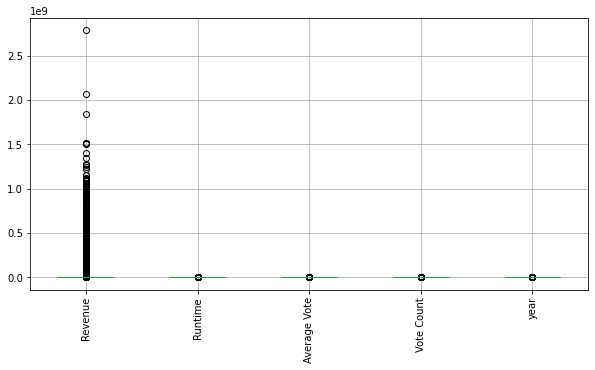

In [107]:
### Box ploting the features which has outliers:

plt.figure(figsize=(10,5))
dataset.boxplot()
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Box plot of Revenue')

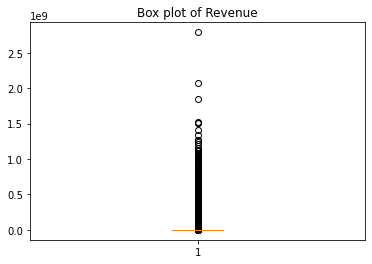

In [108]:
plt.boxplot(dataset['Revenue'])
plt.title('Box plot of Revenue')

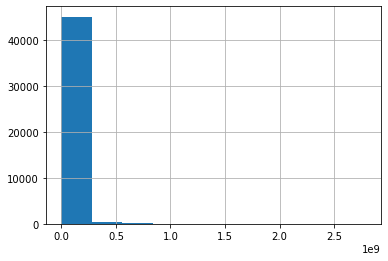

In [109]:
dataset['Revenue'].hist();

######     2. Histogram
To visualize the distribution of a numerical variable, a histogram shows the direction in which these variables are distributed, outliers will appear outside the overall distribution of the data. if the histogram is right-skewed or left-skewed, it indicates the presence of extreme values or outliers

In [110]:
print('skewness value of Revenue: ',dataset['Revenue'].skew())

skewness value of Revenue:  12.266384891750448


Text(0.5, 1.0, 'Box plot of Runtime')

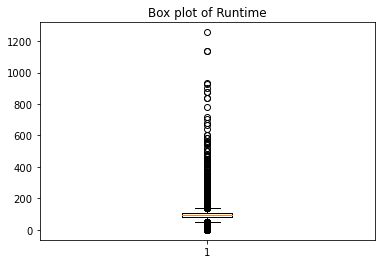

In [111]:
plt.boxplot(dataset['Runtime'])
plt.title('Box plot of Runtime')

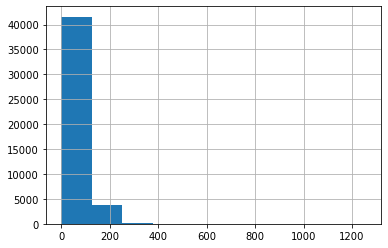

In [112]:
dataset['Runtime'].hist();

            From the histogram above, the histogram appears to be distributed to the left, this also indicates the presence of  outliers.
            The skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

In [113]:
print('skewness value of Runtime: ',dataset['Runtime'].skew())

skewness value of Runtime:  4.478782386381279


            From the above, the 'revenue' skewness value is of 12.27 and the ‘runtime’ skewness value of 4.48 shows the variables has been rightly skewed, indicating the presence of outliers in them.



          Here the data is not Normally distributed and is following the Right Skewed distribution that means we can use the Interquartile Range to measure the boundaries for outliers

#####  b. Handling Outliers :-

1. Flooring and Capping.
2. Trimming.
3. Replacing outliers with the mean, median, mode, or other values.


1. Flooring and Capping.
In this quantile-based technique, we will do the flooring(e.g 25th percentile) for the lower values and capping(e.g for the 75th percentile) for the higher values. These percentile values will be used for the quantile-based flooring and capping.
The code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the variable.

 By using Inter Quartile Range (IQR), we detect outliers. IQR tells us the variation in the data set. Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers. Q1 represents the 1st quartile/25th percentile of the data.
 
 
 
 
  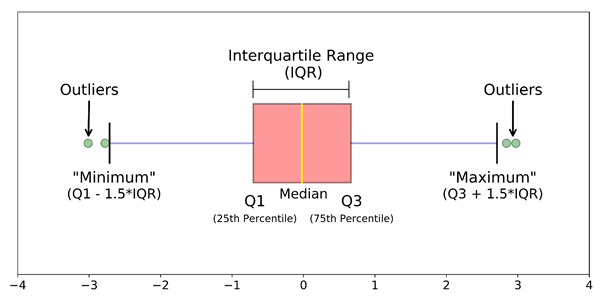

In [114]:
Q1 = dataset['Revenue'].quantile(0.25)
Q3 = dataset['Revenue'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
dataset['Revenue']=np.where(dataset['Revenue']>upper_whisker,upper_whisker,np.where(dataset['Revenue']<lower_whisker,lower_whisker,dataset['Revenue']))

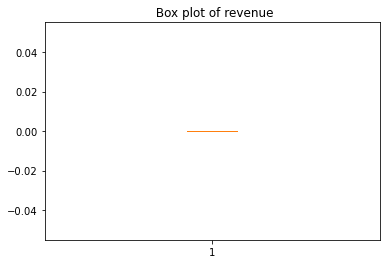

In [115]:
## Checking the presence of outliers in revenue :-

plt.boxplot(dataset['Revenue'])
plt.title(' Box plot of revenue');

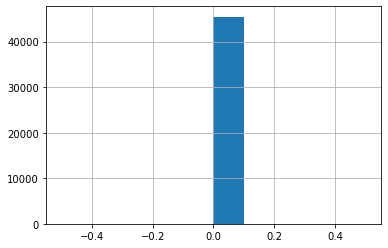

In [116]:
dataset['Revenue'].hist();

2. Trimming


In this method, we remove and completely drop all the outliers, the line of code below creates an index for all data points and drop the index values.

In [117]:
Q1 = dataset['Runtime'].quantile(0.10)
Q3 = dataset['Runtime'].quantile(0.90)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
index=dataset['Runtime'][(dataset['Runtime']>upper_whisker)|(dataset['Runtime']<lower_whisker)].index
dataset.drop(index,inplace=True)

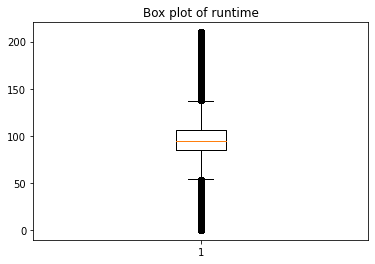

In [118]:
plt.boxplot(dataset['Runtime'])
plt.title('Box plot of runtime');

###### 3. Replacing Outliers With The Mean, Median, Mode, or other Values


In this technique, we replace the extreme values with the mode, median or mean value.   Here mode is used as it is less effected by extreme values

In [119]:
Q1 = dataset['Revenue'].quantile(0.25)
Q3 = dataset['Revenue'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
x=dataset['Revenue'].median()
dataset['Revenue']=np.where(dataset['Revenue']>upper_whisker,x,np.where(dataset['Revenue']<lower_whisker,x,dataset['Revenue']))

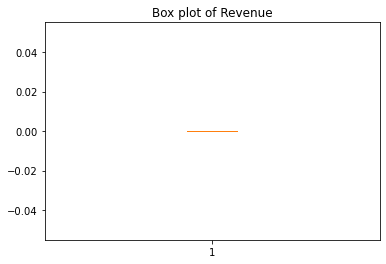

In [120]:
plt.boxplot(dataset['Revenue'])
plt.title('Box plot of Revenue');

In [121]:
Q1 = dataset['Runtime'].quantile(0.25)
Q3 = dataset['Runtime'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
x=dataset['Runtime'].mode()
dataset['Runtime']=np.where(dataset['Runtime']>upper_whisker,x,np.where(dataset['Runtime']<lower_whisker,x,dataset['Runtime']))

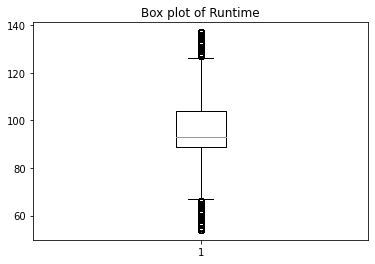

In [122]:
plt.boxplot(dataset['Runtime'])
plt.title('Box plot of Runtime');

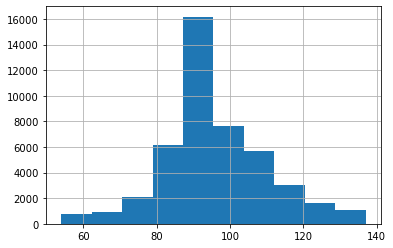

In [123]:
dataset['Runtime'].hist();

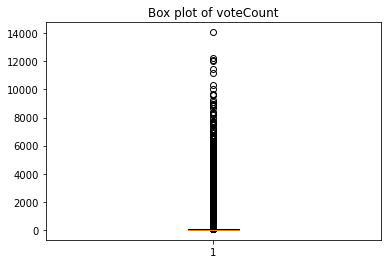

In [124]:
plt.boxplot(dataset['Vote Count'])
plt.title('Box plot of voteCount');

In [125]:
Q1 = dataset['Vote Count'].quantile(0.25)
Q3 = dataset['Vote Count'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
x=dataset['Vote Count'].mode()
dataset['Vote Count']=np.where(dataset['Vote Count']>upper_whisker,x,np.where(dataset['Vote Count']<lower_whisker,x,dataset['Vote Count']))

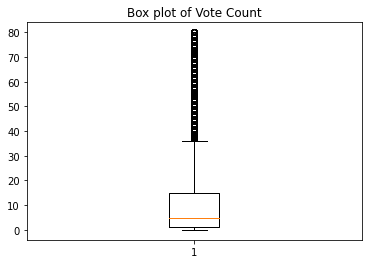

In [126]:
plt.boxplot(dataset['Vote Count'])
plt.title('Box plot of Vote Count');

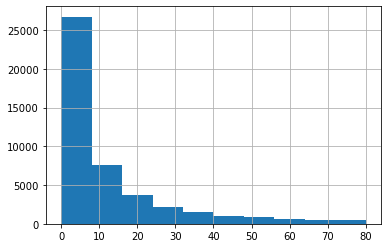

In [127]:
dataset['Vote Count'].hist();

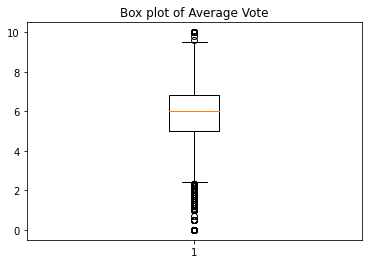

In [128]:
plt.boxplot(dataset['Average Vote'])
plt.title('Box plot of Average Vote');

In [129]:
Q1 = dataset['Average Vote'].quantile(0.25)
Q3 = dataset['Average Vote'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
x=dataset['Average Vote'].mode()
dataset['Average Vote']=np.where(dataset['Average Vote']>upper_whisker,x,np.where(dataset['Average Vote']<lower_whisker,x,dataset['Average Vote']))

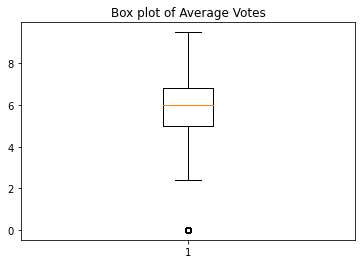

In [130]:
plt.boxplot(dataset['Average Vote'])
plt.title('Box plot of Average Votes');

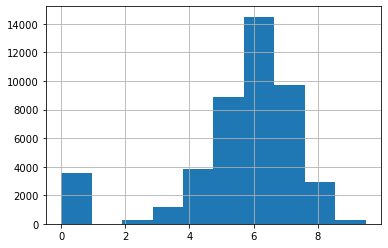

In [131]:
dataset['Average Vote'].hist();

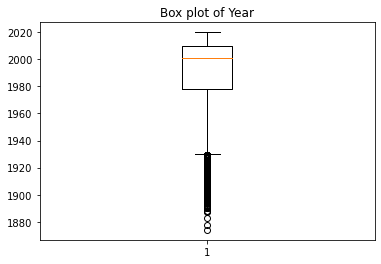

In [132]:
plt.boxplot(dataset['year'])
plt.title('Box plot of Year');

In [133]:
Q1 = dataset['year'].quantile(0.25)
Q3 = dataset['year'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
x=dataset['year'].mode()
dataset['year']=np.where(dataset['year']>upper_whisker,x,np.where(dataset['year']<lower_whisker,x,dataset['year']))

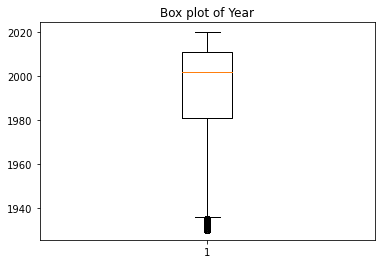

In [134]:
plt.boxplot(dataset['year'])
plt.title('Box plot of Year');

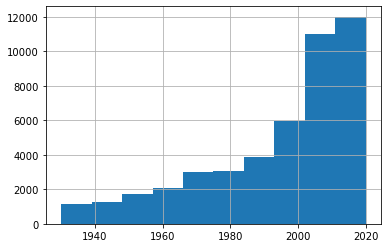

In [135]:
dataset['year'].hist();

######   When we compare the two boxplots with the one before and after the treatment of the outliers, we still observed that there are a few extreme values that may be newly generated.

##  4. Encoding

Most of the machine learning algorithms works on numerical data only and will not be able to process Categorical data. So we need to transform categorical data into numerical form without losing the sense of information. 

#### There are many ways to convert categorical values into numerical values. Each approach has its own trade-offs and impact on the feature set. Hereby, we would focus on 2 main methods: One-Hot-Encoding and Label-Encoder. Both of these encoders are part of SciKit-learn library (one of the most widely used Python library) and are used to convert text or categorical data into numerical data which the model expects and perform better with.

### 4(1). Label Encoding

#### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. Machine learning algorithms involve mathematical techniques to perform operations on the data and hence most of the algorithms operate on numerical data only.

##### The dataset contains majority of object datatypes.

##### Label Encoder and OneHotEncoder are used to convert object datatype to integer datatype.

In [136]:
dataset.head()

,Adult,Budget,Genres,Id,imdb_id,Language,Movie_Name,overview,Popularity,Production_Company,Production_Country,Release_date,Revenue,Runtime,Status,Video,Average Vote,Vote Count,year,month
0,False,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,0.0,81.0,Released,False,7.7,1.0,1995.0,Oct
1,False,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,0.0,104.0,Released,False,6.9,1.0,1995.0,Dec
2,False,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,Released,False,6.5,1.0,1995.0,Dec
3,False,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,0.0,127.0,Released,False,6.1,34.0,1995.0,Dec
4,False,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,0.0,106.0,Released,False,5.7,1.0,1995.0,Feb


In [137]:
dataset.dtypes

Adult                  object
Budget                 object
Genres                 object
Id                     object
imdb_id                object
Language               object
Movie_Name             object
overview               object
Popularity             object
Production_Company     object
Production_Country     object
Release_date           object
Revenue               float64
Runtime               float64
Status                 object
Video                  object
Average Vote          float64
Vote Count            float64
year                  float64
month                  object
dtype: object

In [138]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

dataset['Adult'] = le.fit_transform(dataset['Adult'])
#dataset['Popularity'] = le.fit_transform(dataset['Popularity'])
dataset['Language'] = le.fit_transform(dataset['Language'])
dataset['Movie_Name'] = le.fit_transform(dataset['Movie_Name'])
dataset['overview'] = le.fit_transform(dataset['overview'])
#dataset['Production_Company'] = le.fit_transform(dataset['Production_Company'])
dataset['Release_date'] = le.fit_transform(dataset['Release_date'])
dataset['Status'] = le.fit_transform(dataset['Status'])
dataset['month'] = le.fit_transform(dataset['month'])

In [139]:
dataset['Genres'] = le.fit_transform(dataset['Genres'].astype(str))
dataset['Production_Company'] = le.fit_transform(dataset['Production_Company'].astype(str))

dataset['Popularity'] = le.fit_transform(dataset['Popularity'].astype(str))
dataset['Id'] = le.fit_transform(dataset['Id'].astype(str))
dataset['imdb_id'] = le.fit_transform(dataset['imdb_id'].astype(str))
dataset['Production_Country'] = le.fit_transform(dataset['Production_Country'].astype(str))


In [140]:
dataset['Budget'] = le.fit_transform(dataset['Budget'].astype(str))
dataset['Video'] = le.fit_transform(dataset['Video'].astype(str))

In [141]:
dataset.dtypes

Adult                   int32
Budget                  int32
Genres                  int32
Id                      int32
imdb_id                 int32
Language                int32
Movie_Name              int32
overview                int32
Popularity              int32
Production_Company      int32
Production_Country      int32
Release_date            int32
Revenue               float64
Runtime               float64
Status                  int32
Video                   int32
Average Vote          float64
Vote Count            float64
year                  float64
month                   int32
dtype: object

In [142]:
dataset.describe()

,Adult,Budget,Genres,Id,imdb_id,Language,Movie_Name,overview,Popularity,Production_Company,Production_Country,Release_date,Revenue,Runtime,Status,Video,Average Vote,Vote Count,year,month
count,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.0,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000
mean,0.000199,112.320494,2113.653982,22567.369283,22555.062425,23.579293,21533.466795,22172.122969,21123.907469,14699.741577,1879.379754,10930.400385,0.0,95.649275,4.994687,0.004007,5.556058,11.727011,1993.537583,6.015872
std,0.014114,273.157175,1006.720324,13034.221410,13031.018562,14.156463,12425.144563,12595.287509,12834.392681,7302.209577,665.919955,4760.537303,0.0,14.308879,0.182996,0.089057,1.969620,15.940222,22.065045,3.892882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,54.000000,0.000000,0.000000,0.000000,0.000000,1930.000000,0.000000
25%,0.000000,0.000000,1548.000000,11276.250000,11271.250000,18.000000,10739.250000,11280.250000,9896.250000,8457.250000,1428.000000,7427.250000,0.0,89.000000,5.000000,0.000000,5.000000,1.000000,1981.000000,3.000000
50%,0.000000,0.000000,2020.000000,22564.500000,22555.500000,18.000000,21589.500000,22561.500000,21049.500000,15819.500000,2356.000000,12097.000000,0.0,93.000000,5.000000,0.000000,6.000000,5.000000,2002.000000,6.000000
75%,0.000000,0.000000,2689.000000,33855.750000,33839.750000,18.000000,32308.750000,32745.750000,32237.750000,22564.000000,2356.000000,15013.000000,0.0,104.000000,5.000000,0.000000,6.800000,15.000000,2011.000000,10.000000
max,1.000000,1220.000000,4046.000000,45143.000000,45127.000000,89.000000,43129.000000,44023.000000,43483.000000,22564.000000,2374.000000,17247.000000,0.0,137.000000,6.000000,2.000000,9.500000,80.000000,2020.000000,12.000000


#### 4(2). One Hot Encoder :-

In [143]:
from sklearn.preprocessing import OneHotEncoder

dataset=pd.get_dummies(dataset)

dataset.head(10)

,Adult,Budget,Genres,Id,imdb_id,Language,Movie_Name,overview,Popularity,Production_Company,Production_Country,Release_date,Revenue,Runtime,Status,Video,Average Vote,Vote Count,year,month
0,0,599,1086,42535,16929,18,36693,26515,33481,15189,2356,10605,0.0,81.0,5,0,7.7,1.0,1995.0,11
1,0,972,937,42968,16689,18,16155,42640,29736,19606,2356,10636,0.0,104.0,5,0,6.9,1.0,1995.0,2
2,0,0,3303,8181,16631,18,12725,3130,28334,21651,2356,10641,0.0,101.0,5,0,6.5,1.0,1995.0,2
3,0,265,1394,22533,16959,18,38313,15779,35367,20036,2356,10641,0.0,127.0,5,0,6.1,34.0,1995.0,2
4,0,0,1595,3341,16580,18,10785,25917,42020,16824,2356,10437,0.0,106.0,5,0,5.7,1.0,1995.0,3
5,0,933,348,44136,16646,18,13305,29058,29800,16102,2356,10636,0.0,90.0,5,0,7.7,1.0,1995.0,2
6,0,911,1548,3337,16854,18,26728,12801,39937,14764,1166,10636,0.0,127.0,5,0,6.2,1.0,1995.0,2
7,0,0,94,32292,16421,18,36491,5397,32149,21479,2356,10641,0.0,97.0,5,0,5.4,45.0,1995.0,2
8,0,668,187,43424,16897,18,29445,24408,37717,20620,2356,10641,0.0,106.0,5,0,5.5,1.0,1995.0,2
9,0,911,683,39145,16621,18,12431,25098,29402,20292,2193,10620,0.0,130.0,5,0,6.6,1.0,1995.0,10


In [144]:
dataset.columns


Index(['Adult', 'Budget', 'Genres', 'Id', 'imdb_id', 'Language', 'Movie_Name',
       'overview', 'Popularity', 'Production_Company', 'Production_Country',
       'Release_date', 'Revenue', 'Runtime', 'Status', 'Video', 'Average Vote',
       'Vote Count', 'year', 'month'],
      dtype='object')

### 5. Data Scaling :-

        Data Scaling is a data preprocessing step for numerical features. 

######   Handling Numerical Variables :-
 
              1. MinMax Scaling/ Normalization Method
              
              2. Standardization/ Z-score Approach
               

### 5(1). MinMax Scaling / Normalization Method :-


                  In this the minimum of feature is made equal to zero and the maximum of feature equal to one. MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution. 

            
                            x_std = (x – x.min(axis=0)) / (x.max(axis=0) – x.min(axis=0))

                            x_scaled = x_std * (max – min) + min
                            
                            
                            
                  Where,

                            min, max = feature_range
                            x.min(axis=0) : Minimum feature value
                            x.max(axis=0):Maximum feature value
                            
                            
                            
                          
        
        
                 

Normalization  :-  
                        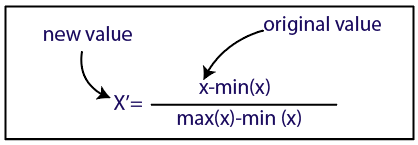
                        
                        
  
    
    
    
    Sklearn preprocessing defines MinMaxScaler() method to achieve this. 

In [145]:

#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

In [146]:
#### Do min max scaling on the feature set (Take ‘Genres’ as target)

#defining feature'X' & target'y'

y =dataset['Genres']

X=dataset.drop('Genres', axis=1)

#X= dataset.drop('Budget',  axis =1)

X.describe()

,Adult,Budget,Id,imdb_id,Language,Movie_Name,overview,Popularity,Production_Company,Production_Country,Release_date,Revenue,Runtime,Status,Video,Average Vote,Vote Count,year,month
count,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.0,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000
mean,0.000199,112.320494,22567.369283,22555.062425,23.579293,21533.466795,22172.122969,21123.907469,14699.741577,1879.379754,10930.400385,0.0,95.649275,4.994687,0.004007,5.556058,11.727011,1993.537583,6.015872
std,0.014114,273.157175,13034.221410,13031.018562,14.156463,12425.144563,12595.287509,12834.392681,7302.209577,665.919955,4760.537303,0.0,14.308879,0.182996,0.089057,1.969620,15.940222,22.065045,3.892882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,54.000000,0.000000,0.000000,0.000000,0.000000,1930.000000,0.000000
25%,0.000000,0.000000,11276.250000,11271.250000,18.000000,10739.250000,11280.250000,9896.250000,8457.250000,1428.000000,7427.250000,0.0,89.000000,5.000000,0.000000,5.000000,1.000000,1981.000000,3.000000
50%,0.000000,0.000000,22564.500000,22555.500000,18.000000,21589.500000,22561.500000,21049.500000,15819.500000,2356.000000,12097.000000,0.0,93.000000,5.000000,0.000000,6.000000,5.000000,2002.000000,6.000000
75%,0.000000,0.000000,33855.750000,33839.750000,18.000000,32308.750000,32745.750000,32237.750000,22564.000000,2356.000000,15013.000000,0.0,104.000000,5.000000,0.000000,6.800000,15.000000,2011.000000,10.000000
max,1.000000,1220.000000,45143.000000,45127.000000,89.000000,43129.000000,44023.000000,43483.000000,22564.000000,2374.000000,17247.000000,0.0,137.000000,6.000000,2.000000,9.500000,80.000000,2020.000000,12.000000


#Feature Scaling using MinMax Scaler


minmax = MinMaxScaler()
X = minmax.fit_transform(X)
print(X)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [148]:
X.describe()

,Adult,Budget,Id,imdb_id,Language,Movie_Name,overview,Popularity,Production_Company,Production_Country,Release_date,Revenue,Runtime,Status,Video,Average Vote,Vote Count,year,month
count,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.0,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000
mean,0.000199,112.320494,22567.369283,22555.062425,23.579293,21533.466795,22172.122969,21123.907469,14699.741577,1879.379754,10930.400385,0.0,95.649275,4.994687,0.004007,5.556058,11.727011,1993.537583,6.015872
std,0.014114,273.157175,13034.221410,13031.018562,14.156463,12425.144563,12595.287509,12834.392681,7302.209577,665.919955,4760.537303,0.0,14.308879,0.182996,0.089057,1.969620,15.940222,22.065045,3.892882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,54.000000,0.000000,0.000000,0.000000,0.000000,1930.000000,0.000000
25%,0.000000,0.000000,11276.250000,11271.250000,18.000000,10739.250000,11280.250000,9896.250000,8457.250000,1428.000000,7427.250000,0.0,89.000000,5.000000,0.000000,5.000000,1.000000,1981.000000,3.000000
50%,0.000000,0.000000,22564.500000,22555.500000,18.000000,21589.500000,22561.500000,21049.500000,15819.500000,2356.000000,12097.000000,0.0,93.000000,5.000000,0.000000,6.000000,5.000000,2002.000000,6.000000
75%,0.000000,0.000000,33855.750000,33839.750000,18.000000,32308.750000,32745.750000,32237.750000,22564.000000,2356.000000,15013.000000,0.0,104.000000,5.000000,0.000000,6.800000,15.000000,2011.000000,10.000000
max,1.000000,1220.000000,45143.000000,45127.000000,89.000000,43129.000000,44023.000000,43483.000000,22564.000000,2374.000000,17247.000000,0.0,137.000000,6.000000,2.000000,9.500000,80.000000,2020.000000,12.000000


###  5(2). Standardization/ Z - Score Approach :-

######  Standard Scaler helps to get standardized distribution, with a zero mean and standard deviation of one (unit variance).


###### It standardizes features by subtracting the mean value from the feature and then dividing the result by feature standard deviation. 

    
                            
                                    Z = (X - u)/ S
                                 
                    Where,

                                z is scaled data.
                                x is to be scaled data.
                                u is the mean of the training samples
                                s is the standard deviation of the training samples.             
                 
                 
######   Sklearn preprocessing supports StandardScaler() method to achieve this directly in merely 2-3 steps.

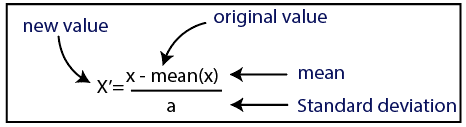

Implementing Feature Scaling by Standardization in Python 

from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
X = standardisation.fit_transform(X)
X = pd.DataFrame(X)
X.describe()

corrmatrix = dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=1, annot=True, linewidths=0.2, cmap='YlGnBu')

In [149]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['Revenue','Runtime','Vote Count','Average Vote']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [150]:
X_train_stand.describe()

,Adult,Budget,Id,imdb_id,Language,Movie_Name,overview,Popularity,Production_Company,Production_Country,Release_date,Revenue,Runtime,Status,Video,Average Vote,Vote Count,year,month
count,36139.000000,36139.000000,36139.000000,36139.000000,36139.000000,36139.000000,36139.000000,36139.000000,36139.000000,36139.000000,36139.000000,36139.0,3.613900e+04,36139.000000,36139.000000,3.613900e+04,3.613900e+04,36139.000000,36139.000000
mean,0.000221,112.038186,22601.658181,22533.345306,23.636957,21543.558123,22106.750270,21112.475802,14721.508647,1877.527187,10920.146324,0.0,5.426173e-16,4.994466,0.004123,5.081239e-18,1.923498e-16,1993.510540,6.016547
std,0.014877,272.716642,13013.721973,13039.874496,14.233139,12430.276808,12610.356947,12831.812771,7294.244744,667.146175,4766.216513,0.0,1.000014e+00,0.183503,0.090562,1.000014e+00,1.000014e+00,22.081313,3.900267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,-2.908136e+00,0.000000,0.000000,-2.823321e+00,-7.376621e-01,1930.000000,0.000000
25%,0.000000,0.000000,11317.500000,11201.500000,18.000000,10743.500000,11184.500000,9891.000000,8523.500000,1428.000000,7395.000000,0.0,-4.645098e-01,5.000000,0.000000,-2.810151e-01,-6.745234e-01,1980.000000,3.000000
50%,0.000000,0.000000,22671.000000,22520.000000,18.000000,21588.000000,22477.000000,20997.000000,15880.000000,2356.000000,12094.000000,0.0,-1.852383e-01,5.000000,0.000000,2.274460e-01,-4.219685e-01,2002.000000,6.000000
75%,0.000000,0.000000,33873.500000,33776.000000,18.000000,32332.500000,32671.500000,32260.500000,22564.000000,2356.000000,15013.000000,0.0,5.827586e-01,5.000000,0.000000,6.342150e-01,2.094188e-01,2011.000000,10.000000
max,1.000000,1220.000000,45143.000000,45127.000000,89.000000,43128.000000,44023.000000,43483.000000,22564.000000,2374.000000,17247.000000,0.0,2.886749e+00,6.000000,2.000000,2.007060e+00,4.313436e+00,2020.000000,12.000000


##  Data Modelling :-

In [151]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [152]:
y = dataset['Genres']
X = dataset.drop('Genres', axis=1)



In [153]:
y = le.fit_transform(y)

###  Splitting data into Train-Test sets :-

This is usually the last step of data preprocessing just before training supervised machine learning model. 

In this step, given data set, after undergoing all cleaning and transformation is divided into two parts – 
               1. one for training of machine learning model and 
               2. second for testing the trained model.
               
               
While splitting data set, care has to be taken that there is no loss of information in training data set.               

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [155]:
X_train.shape

(36139, 19)

##  Classification Models :-

  ###  1. Logistic Regression Model:

In [156]:
log_reg = LogisticRegression()
model = log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)


In [157]:
print('Accuracy of Logistic Regression model is :',accuracy_score(y_test,y_pred)*100)
print("Precision is :",precision_score(y_test,y_pred,average='weighted'))
print("Recall is : ",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score is :",f1_score(y_test,y_pred,average='weighted'))

Accuracy of Logistic Regression model is : 14.089651355838406
Precision is : 0.05185175983286693
Recall is :  0.14089651355838406
F1 Score is : 0.07064083658360572


## 2. Linear Regression Model

In [158]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test) 
print('MSE is:', mean_squared_error(y_test,predictions)) 
print('R-squared value is:' ,r2_score(y_test,predictions))

MSE is: 962701.0713053072
R-squared value is: 0.0497070569390593


### 3. K- Nearest Neighbor - (KNN)  Model

In [159]:
#from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,20)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [160]:
acc_values

[0.0509131156613171,
 0.054122855561704486,
 0.06463752075262867,
 0.06884338682899833,
 0.07548422800221362,
 0.08323187603763144,
 0.0884338682899834,
 0.0945213060320974,
 0.09839513004980631,
 0.10105146651909241,
 0.10381848367459878,
 0.10514665190924184,
 0.10913115661317101,
 0.1089097952407305,
 0.11123408965135584,
 0.11267293857221915,
 0.11455451023796348]

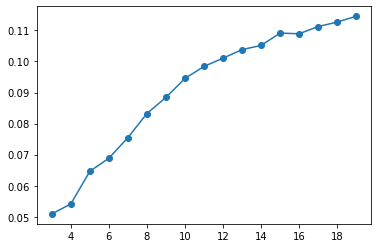

In [161]:
plt.plot(neighbors, acc_values,'o-')     #graph showing accuracy against knn

#####   Accuacy of KNN model is seen maximum at 20.

classifier=KNeighborsClassifier(n_neighbors=20, metric='minkowski')
classifier.fit(X_train,y_train.values.ravel())
y_pred=classifier.predict(X_test)

print('Accuracy is:', accuracy_score(y_test,y_pred))

In [162]:
# training a KNN model
from sklearn.neighbors import KNeighborsRegressor
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# knn 
knn = KNeighborsRegressor(n_neighbors=7)

rmse = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    knn.fit(trainX[i],y_train)
    # predict
    pred = knn.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result
df_knn = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_knn

,RMSE
Original,1028.901642
Normalized,1018.454044
Standardized,1028.901642


In [163]:
from sklearn import svm 
from sklearn.svm import SVC

#### 4. Support Vector Machine Model  (SVC) :-

In [164]:
# training an SVR model
from  sklearn.svm import SVR
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# SVR
svr = SVR(kernel='rbf',C=5)

rmse = []

# raw, normalized and standardized training and testing data
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    svr.fit(trainX[i],y_train)
    # predict
    pred = svr.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_svr = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_svr

,RMSE
Original,993.636888
Normalized,990.573322
Standardized,993.637270


#### 5. Decision Tree Model :-

In [165]:
# training a Decision Tree model
from sklearn.tree import DecisionTreeRegressor
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# Decision tree
dt = DecisionTreeRegressor(max_depth=10,random_state=27)

rmse = []

# raw, normalized and standardized training and testing data
trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    dt.fit(trainX[i],y_train)
    # predict
    pred = dt.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_dt = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_dt

,RMSE
Original,1007.493524
Normalized,1007.272031
Standardized,1007.657659


#### 6. Random Forest Regression Model :-

In [166]:
# Training a Random Forest Regression Model
from sklearn.ensemble import RandomForestClassifier

# measuring RMSE score
from sklearn.metrics import mean_squared_error

# Random Forest Regression Model

#rnf = RandomForestClassifier(n_estimators=100,random_state = 27)
rnf = RandomForestClassifier(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)

rmse =[]

# raw, normalized and standardized training and testing data
trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    rnf.fit(trainX[i],y_train)
    # predict
    pred = rnf.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_rnf = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_rnf



,RMSE
Original,1120.694075
Normalized,1120.694075
Standardized,1120.694075


In [269]:
X.describe()

,Adult,Budget,Id,imdb_id,Language,Movie_Name,overview,Popularity,Production_Company,Production_Country,Release_date,Revenue,Runtime,Status,Video,Average Vote,Vote Count,year,month
count,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.0,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000,45174.000000
mean,0.000199,112.320494,22567.369283,22555.062425,23.579293,21533.466795,22172.122969,21123.907469,14699.741577,1879.379754,10930.400385,0.0,95.649275,4.994687,0.004007,5.556058,11.727011,1993.537583,6.015872
std,0.014114,273.157175,13034.221410,13031.018562,14.156463,12425.144563,12595.287509,12834.392681,7302.209577,665.919955,4760.537303,0.0,14.308879,0.182996,0.089057,1.969620,15.940222,22.065045,3.892882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,54.000000,0.000000,0.000000,0.000000,0.000000,1930.000000,0.000000
25%,0.000000,0.000000,11276.250000,11271.250000,18.000000,10739.250000,11280.250000,9896.250000,8457.250000,1428.000000,7427.250000,0.0,89.000000,5.000000,0.000000,5.000000,1.000000,1981.000000,3.000000
50%,0.000000,0.000000,22564.500000,22555.500000,18.000000,21589.500000,22561.500000,21049.500000,15819.500000,2356.000000,12097.000000,0.0,93.000000,5.000000,0.000000,6.000000,5.000000,2002.000000,6.000000
75%,0.000000,0.000000,33855.750000,33839.750000,18.000000,32308.750000,32745.750000,32237.750000,22564.000000,2356.000000,15013.000000,0.0,104.000000,5.000000,0.000000,6.800000,15.000000,2011.000000,10.000000
max,1.000000,1220.000000,45143.000000,45127.000000,89.000000,43129.000000,44023.000000,43483.000000,22564.000000,2374.000000,17247.000000,0.0,137.000000,6.000000,2.000000,9.500000,80.000000,2020.000000,12.000000


In [270]:
dataset.dtypes

Adult                   int32
Budget                  int32
Genres                  int32
Id                      int32
imdb_id                 int32
Language                int32
Movie_Name              int32
overview                int32
Popularity              int32
Production_Company      int32
Production_Country      int32
Release_date            int32
Revenue               float64
Runtime               float64
Status                  int32
Video                   int32
Average Vote          float64
Vote Count            float64
year                  float64
month                   int32
dtype: object

#    Simple Recommendation System : -

The Simple Recommendation System offers generalized recommnendations to every user based on movie popularity and (sometimes) genre. The basic idea behind this recommender is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience. This model does not give personalized recommendations based on the user.

The implementation of this model is extremely trivial. All we have to do is sort our movies based on ratings and popularity and display the top movies of our list. As an added step, we can pass in a genre argument to get the top movies of a particular genre

I use the TMDB Ratings to come up with our Top Movies Chart. I will use IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) = I use the TMDB Ratings to come up with our Top Movies Chart. I will use IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) = ( (v/v + m) * R) + ((v/ v+ m) *C
 
 
 

where,

v is the number of votes for the movie
m is the minimum votes required to be listed in the chart
R is the average rating of the movie
C is the mean vote across the whole report
The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 95th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

By building an overall Top 250 Chart and will define a function to build charts for a particular genre. Let's begin!

In [289]:
# votes counts column excluding the null values and casting it into integer
Vote_Counts = dataset[dataset['Vote Count'].notnull()]['Vote Count'].astype('int')

# vote averages column exlcuding the null values and casting into float
vote_averages = dataset[dataset['Average Vote'].notnull()]['Average Vote'].astype('int')

# Calculating average value
C = vote_averages.mean()
C

5.184265285341126

In [290]:
dataset.dtypes


Adult                   int32
Budget                  int32
Genres                  int32
Id                      int32
imdb_id                 int32
Language                int32
Movie_Name              int32
overview                int32
Popularity              int32
Production_Company      int32
Production_Country      int32
Release_date            int32
Revenue               float64
Runtime               float64
Status                  int32
Video                   int32
Average Vote          float64
Vote Count            float64
year                  float64
month                   int32
dtype: object

In [291]:
#calculating minimum number of votes requirement for any entry using the 95th percentile

m = Vote_Counts.quantile(0.95)
m

49.0

In [292]:
# Copying the appropriate columns of metadata to qualified movies with votes_counts >= m

qualified_movies = dataset[(dataset['Vote Count'] >= m) & (dataset['Vote Count'].notnull()) & (dataset['Average Vote'].notnull())][['Movie_Name', 'year', 'Vote Count', 'Average Vote', 'Popularity', 'Genres']]
qualified_movies['Vote Count'] = qualified_movies['Vote Count'].astype('int')
qualified_movies['Average Vote'] = qualified_movies['Average Vote'].astype('int')
qualified_movies.shape

(2362, 6)

In [293]:
dataset.dtypes

Adult                   int32
Budget                  int32
Genres                  int32
Id                      int32
imdb_id                 int32
Language                int32
Movie_Name              int32
overview                int32
Popularity              int32
Production_Company      int32
Production_Country      int32
Release_date            int32
Revenue               float64
Runtime               float64
Status                  int32
Video                   int32
Average Vote          float64
Vote Count            float64
year                  float64
month                   int32
dtype: object

Therefore, to qualify to be considered for the chart, a movie has to have at least 434 votes on TMDB. We also see that the average rating for a movie on TMDB is 5.244 on a scale of 10. 2362 Movies qualify to be on our chart

In [294]:
# Function that computes the weighted rating of each movie'

def weighted_rating(x):
    v = x['Vote Count']
    R = x['Average Vote']
    
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [295]:
qualified_movies['wr'] = qualified_movies.apply(weighted_rating, axis=1)

In [296]:
qualified_movies.head()

,Movie_Name,year,Vote Count,Average Vote,Popularity,Genres,wr
13,22753,1995.0,72,7,37496,2819,6.264702
40,26113,1995.0,50,6,36615,2366,5.596253
41,7944,1995.0,80,6,43390,339,5.690147
60,10523,1996.0,65,5,36909,2351,5.079202
70,10603,1995.0,54,4,38778,606,4.563388


In [297]:
qualified_movies = qualified_movies.sort_values('wr', ascending=False).head(250)

In [298]:
qualified_movies.head(15)

,Movie_Name,year,Vote Count,Average Vote,Popularity,Genres,wr
18533,19687,2011.0,80,8,36153,1595,6.930457
24236,33482,2014.0,75,8,37241,2798,6.887331
25024,38136,2014.0,74,8,38008,1837,6.878285
9674,18473,1960.0,73,8,38659,1707,6.869090
7819,928,1946.0,73,8,39629,2639,6.869090
8860,2454,1985.0,71,8,40651,2054,6.850242
18697,30657,2011.0,70,8,33879,791,6.840580
16978,19685,2010.0,70,8,35418,1595,6.840580
10663,42126,1949.0,70,8,37844,2374,6.840580
7643,41945,1954.0,68,8,37509,2374,6.820761


From the above output we can say that the simple recommender does really well! We all have seen these top rated movies on IMDb top 250 movies list.¶
We also happen to see that three Christopher Nolan Films, Inception, The Dark Knight and Interstellar occur at the very top of our chart. The chart also indicates a strong bias of TMDB Users towards particular genres and directors.
Let us now construct our function that builds charts for particular genres. For this, we will use relax our default conditions to the 85th percentile instead of 9

In [299]:
dataset.dtypes

Adult                   int32
Budget                  int32
Genres                  int32
Id                      int32
imdb_id                 int32
Language                int32
Movie_Name              int32
overview                int32
Popularity              int32
Production_Company      int32
Production_Country      int32
Release_date            int32
Revenue               float64
Runtime               float64
Status                  int32
Video                   int32
Average Vote          float64
Vote Count            float64
year                  float64
month                   int32
dtype: object

In [305]:
s = qualified_movies.apply(lambda x: pd.Series(x['Genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_dataset = qualified_movies.drop('Genres', axis=1).join(s)
gen_dataset.head()

,Movie_Name,year,Vote Count,Average Vote,Popularity,wr,genre
18533,19687,2011.0,80,8,36153,6.930457,1595.0
24236,33482,2014.0,75,8,37241,6.887331,2798.0
25024,38136,2014.0,74,8,38008,6.878285,1837.0
9674,18473,1960.0,73,8,38659,6.869090,1707.0
7819,928,1946.0,73,8,39629,6.869090,2639.0


In [306]:
gen_dataset.dtypes

Movie_Name        int32
year            float64
Vote Count        int32
Average Vote      int32
Popularity        int32
wr              float64
genre           float64
dtype: object

##### Future Procedings: -

###### On further Inverse Encoding, We are able to build the chart of the movies comes under particular genre selected as per the user's demand.

Let us see our method in action by displaying the Top 15 selected Genre based Movies.

build_chart('Romance').head(15)

build_chart('Comedy').head(15)

build_chart('Action').head(15)